## Постановка проблеми

Цей підручник базується на практичному та кодовому підході. Ми визначимо терміни _машинне навчання_ та _лінійна регресія_ в контексті проблеми, а потім узагальнимо їх визначення. Ми пройдемо крок за кроком через типову проблему машинного навчання:


> **ПИТАННЯ**: Компанія ACME Insurance Inc. пропонує доступне медичне страхування тисячам клієнтів по всіх Сполучених Штатах. Як головний дата-сайентіст в ACME, **вам доручено створити автоматизовану систему для оцінки річних медичних витрат для нових клієнтів**, використовуючи інформацію, таку як їх вік, стать, ІМТ, діти, звички щодо куріння та регіон проживання.
>
> Оцінки з вашої системи будуть використовуватися для визначення річної страхової премії (сума, що сплачується щомісяця) пропонованої клієнту. Через регулятивні вимоги, ви повинні мати змогу пояснити, чому ваша система видає певний прогноз.
>
> Вам надано [CSV файл](https://drive.google.com/file/d/13UBFUbkaqccMc4WFHs60tzndCyTOWGE_/view?usp=sharing), що містить перевірені історичні дані, які складаються з вищезгаданої інформації та фактичних медичних витрат, здійснених понад 1300 клієнтами.
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Джерело набору даних: https://github.com/stedy/Machine-Learning-with-R-datasets


**ВПРАВА 1**: Перед тим як продовжувати, зупиніться на мить і подумайте, як ви можете підійти до цієї проблеми. Запишіть п'ять або більше ідей, які приходять вам на думку нижче:

1. Можна розділити клієнтів на групи за схожими ознаками і для кожної зробити заздалегідь фіксовану ціну.
2. Коли приходить новий клієнт, то знаходити максимально схожого на нього існуючого та виставляти ціну таку ж.
3. Зробити одну фіксовану ціну за страховку, а за кожну додаткову характеристику клієнта, наприклад, куріння, рахувати як додаток.

## Завантаження даних

Для початку, давайте завантажимо дані з файлу csv.

In [1]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'/content/drive/MyDrive/ML Intensive from 0 to Hero/medical-charges.csv'

In [ ]:
!ls 'drive/MyDrive/ML Intensive from 0 to Hero'

In [ ]:
file_name = 'drive/MyDrive/ML Intensive from 0 to Hero/medical-charges.csv'

In [2]:
medical_df = pd.read_csv(file_name)

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Набір даних містить 1338 рядків та 7 стовпців. Кожен рядок набору даних містить інформацію про одного клієнта.

Наша мета - знайти спосіб оцінки значення в стовпці "charges", використовуючи значення в інших стовпцях. Якщо ми можемо це зробити для історичних даних, то ми повинні змогти оцінити вартість для нових клієнтів, просто запитавши інформацію, таку як їх вік, стать, ІМТ, кількість дітей, звички щодо куріння та регіон.

Давайте перевіримо тип даних для кожного стовпця.

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Схоже, що "вік", "діти", "ІМТ" ([індекс маси тіла](https://en.wikipedia.org/wiki/Body_mass_index)) та "платежі" є числами, тоді як "стать", "курець" та "регіон" є рядками (можливо, категоріями). Жоден з стовпців не містить пропущених значень, що економить нам чимало часу!

Про те, як можна заповнювати пропущені дані і чому це варто робити - розповідаю на великому курсі, а для тих, хто хоче розібратись прямо зараз рекомендую [статтю](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/) .

Глянемо статистику для числових стовпців:

In [5]:
medical_df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


Діапазони значень в числових стовпцях також здаються розумними (немає від'ємного віку!), тому нам може не довестися робити багато очищення даних або корекції. Однак стовпець "charges" здається значно спотвореним, оскільки медіана (50 перцентиль) набагато нижча за максимальне значення.

> **ВПРАВА 2**: Які інші висновки ви можете зробити, переглядаючи таблицю вище? Додайте свої висновки нижче:
>
> 1. Age, bmi, children розподілені рівномірно, медіана та середнє дуже близькі. Відсутні екстримальні значення для них.
> 2. Компанія страхує повнолітніх, починаючи з 18 років.
> 3. Стовпець charges тяжіє до великих значень, що свідчить про великі страхові суми для певних клієнтів.
> 4. Можна побачити великий розрив між 50, 75 та 100(max) перцентилями.

## Дослідницький аналіз та візуалізація з plotly

Давайте дослідимо дані, візуалізуючи розподіл значень у деяких стовпцях набору даних, а також взаємозв'язки між "витратами" та іншими стовпцями.

В машинному навчанні найчастіше використовують бібліотеки Matplotlib, Seaborn та Plotly для візуалізації. І ми теж будемо працювати з ними. Аби отримати інтро про те, як ними користуватись - рекомендую наступні ресурси Ознайомтеся з цими посібниками, щоб дізнатися, як використовувати ці бібліотеки:

- https://matplotlib.org/stable/users/explain/quick_start.html
- https://plotly.com/python/getting-started/

Але навіть якщо ви ніколи не користувались цими існтрументами - це не біда. Просто робіть за мною за аналогією і ви вже будете будувати найнеобхіжніші графіки. А в роботі можете просто потім скопіювати код звідси 😉

Спочатку імпортуємо всі лібки. Зазвичай ми їх імпортуємо саме в такий спосіб, це зручно для подальшого використання.

In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Наступні налаштування допоможуть покращити стандартний стиль та розміри шрифтів для наших діаграм. Налаштування за замовченням - теж норм. Справа смаку.

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Вік

Вік - це числова колонка. Мінімальний вік в наборі даних - 18 років, а максимальний - 64 роки. Таким чином, ми можемо візуалізувати розподіл віку, використовуючи гістограму з 47 бінами (один на кожен рік) та ящик з вусами. Ми використаємо plotly для створення інтерактивної діаграми, але ви можете створити подібні діаграми, використовуючи Seaborn.

Про те, які бувають графіки і коли який використовувати можна ознайомитись тут:

  https://datavizcatalogue.com/

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

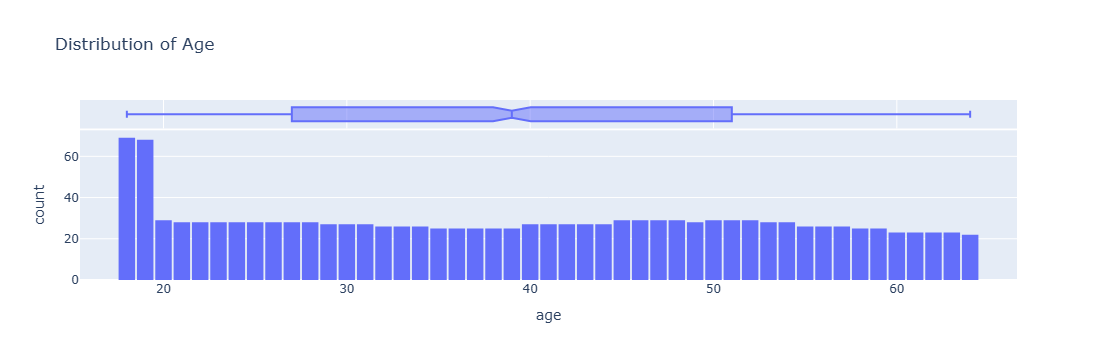

In [13]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Розподіл віку в наборі даних майже рівномірний, з 20-30 клієнтами на кожен вік, за винятком 18 та 19 років, де здається, що клієнтів більше ніж у два рази порівняно з іншими віками. Рівномірний розподіл може виникнути через те, що немає великої варіації в [кількості людей певного віку](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (між 18 та 64 роками) в США.

> **ВПРАВА 3**: Чи можете ви пояснити, чому клієнтів віком 18 та 19 років більше ніж у два рази порівняно з іншими віками?
>
> ???

### Індекс маси тіла

Давайте подивимося на розподіл ІМТ (Індексу маси тіла) клієнтів, використовуючи гістограму та ящик з вусами.

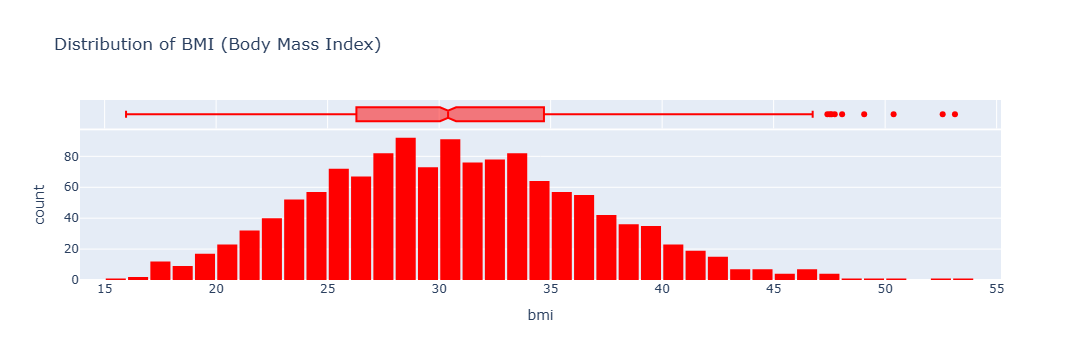

In [11]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

Вимірювання індексу маси тіла, здається, формують [гауссівський розподіл](https://en.wikipedia.org/wiki/Normal_distribution), центрований навколо значення 30, з кількома викидами вправо. Ось як можна інтерпретувати значення ІМТ ([джерело](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> **ВПРАВА 4**: Чи можете ви пояснити, чому розподіл віків формує рівномірний розподіл, а розподіл ІМТ формує гауссовий розподіл?
> Вік - це лінійний процес. Дана страхова компанія має клієнтів різного року народження і кожна людина дорослішає рівно на один рік щороку.
> ІМТ — це сума багатьох біологічних та соціальних випадковостей (генетика, харчування, фіз.активність, тощо). Більшість людей мають середній набір цих факторів, тому вони опиняються в центрі «дзвона». 

### Збори

Давайте візуалізуємо розподіл "зборів", тобто річних медичних витрат для клієнтів. Це колонка, яку ми намагаємося передбачити. Також використовуймо категоріальну колонку "курець", щоб відрізнити збори для курців та некурців.

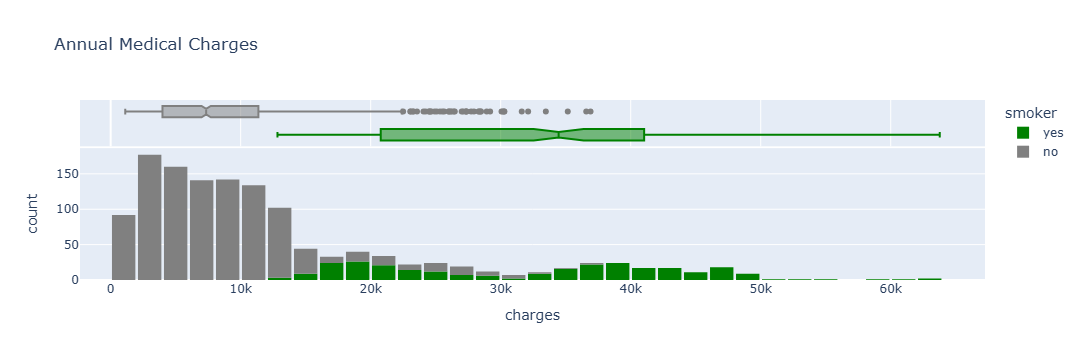

In [14]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Ми можемо зробити наступні спостереження з вищенаведеного графіку:

* Для більшості клієнтів річні медичні витрати становлять менше \$10,000. Тільки невелика частина клієнтів має вищі медичні витрати, можливо, через нещасні випадки, серйозні хвороби та генетичні захворювання. Розподіл схожий на експоненційний ("power law").
* Існує значна різниця в медичних витратах між курцями та некурцями. Тоді як медіана для некурців становить \$7300, медіана для курців наближається до \$35,000.


> **ВПРАВА 5**: Візуалізуйте розподіл медичних витрат у зв'язку з іншими факторами, такими як "стать" та "регіон". Що ви спостерігаєте?

In [22]:
def show_graph(data, target_col, depend_col):
    fig = px.histogram(medical_df,
                   x= target_col,
                   marginal='box',
                   color=depend_col,
                   title='Annual Medical Charges')
    fig.update_layout(bargap=0.1)
    fig.show()

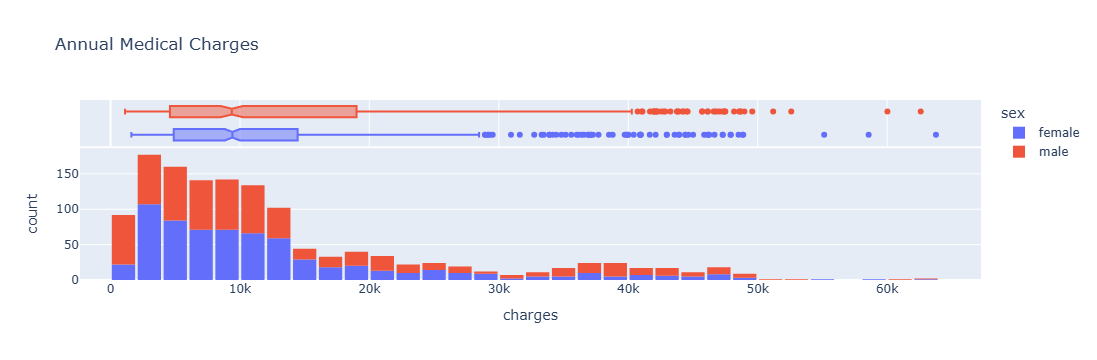

In [23]:
show_graph(medical_df, 'charges', 'sex')

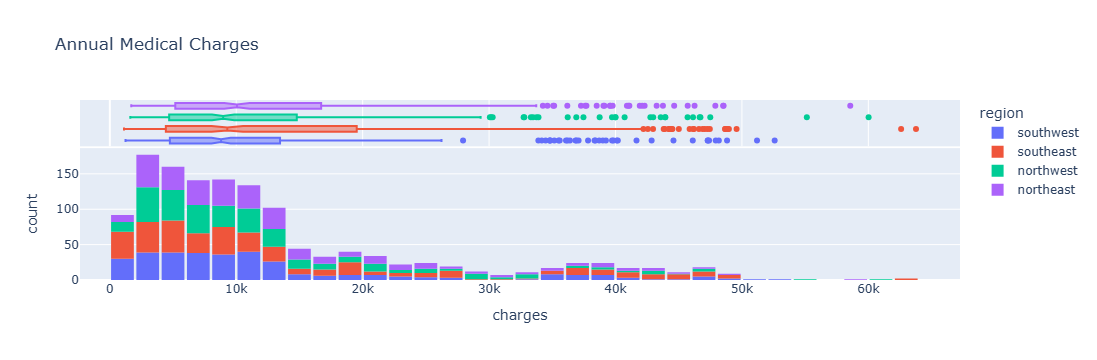

In [24]:
show_graph(medical_df, 'charges', 'region')

### Курець

Давайте візуалізуємо розподіл колонки "курець" (що містить значення "так" та "ні") за допомогою гістограми.

In [25]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

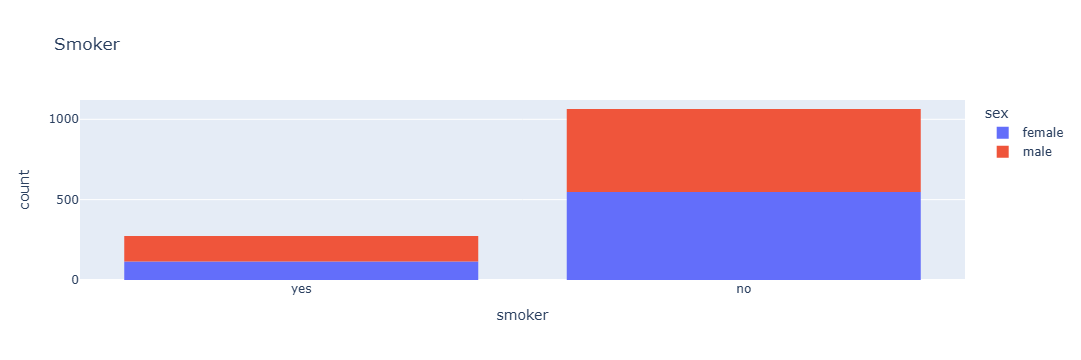

In [26]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

Виглядає, що лише 20% клієнтів повідомили, що вони курять. Маючи якусь нац статистику щодо куріння ми б могли порівняти це з даними.Чи можете ви перевірити, чи відповідає це національному середньому, припускаючи, що дані були зібрані у 2010 році? Ми також бачимо, що куріння здається більш поширеним звичкам серед чоловіків. Чи можете ви це підтвердити?

> **ВПРАВА 6**: Візуалізуйте розподіл стовпців "стать", "регіон" та "діти" та описуйте свої спостереження.

### Візуалізація розподілу колонки `sex`

In [30]:
medical_df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

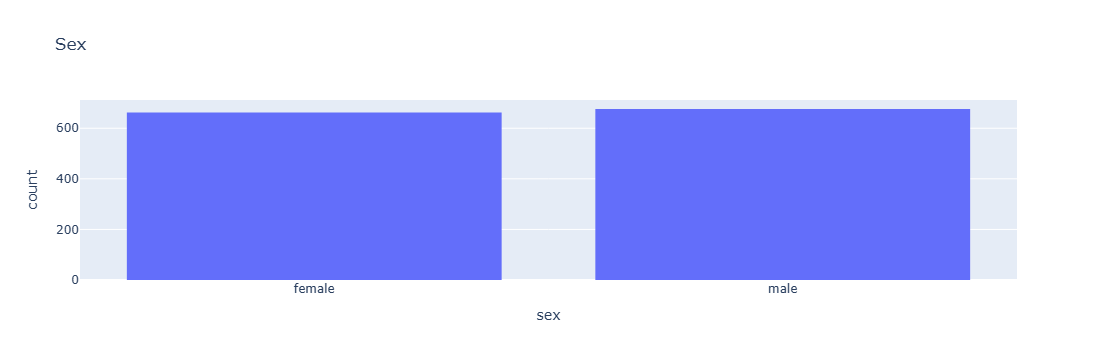

In [43]:
px.histogram(medical_df, x='sex', title='Sex')

**Спостереження**
- Бачимо, що кількість чоловіків і жінок у датасеті майже однакова. Це добре для майбутньої моделі, не буде упередження по статі.

### Візуалізація розподілу колонки `region`

In [31]:
medical_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

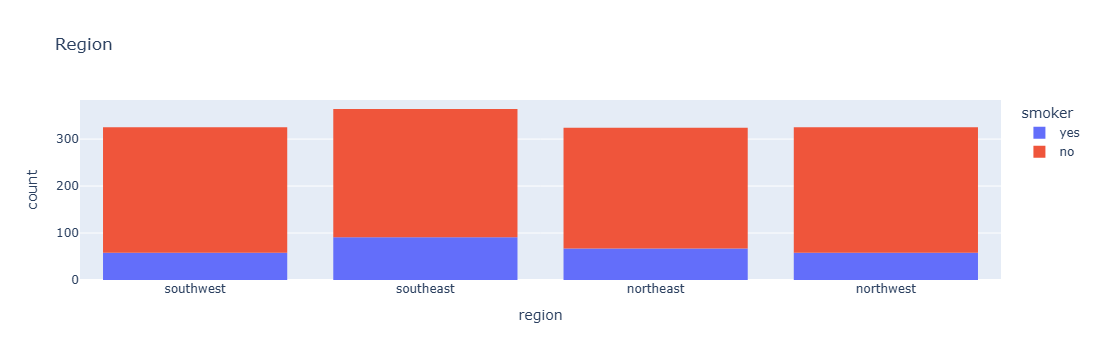

In [40]:
px.histogram(medical_df, x='region', color='smoker', title='Region')

**Спостереження**
- У регіоні southeast найбільша к-ть курців. Це насамперед зв'язано з великою концентрацією клієнтів в цьому регіоні. Тому середні страхові виплати там будуть вищими.
- Загальна кількість людей у регіонах різна, для точного висновку про ризиковість регіону варто перевірити відсоток курців, а не їхню кількість.

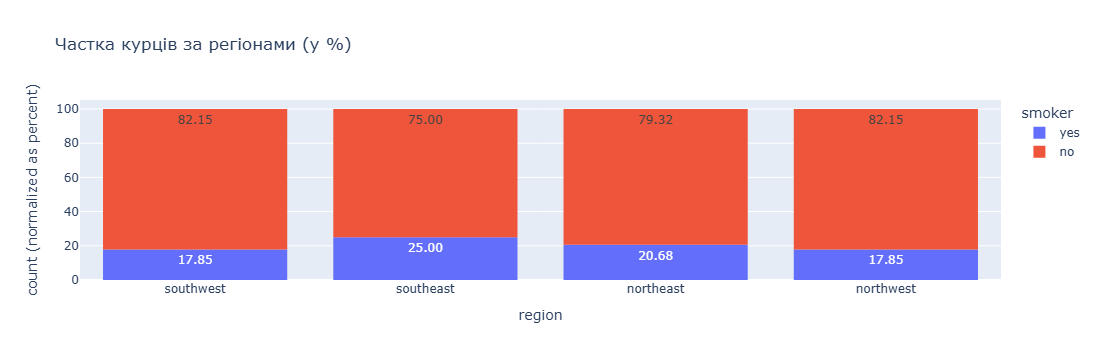

In [48]:
px.histogram(
    medical_df, 
    x='region', 
    color='smoker', 
    barnorm='percent', 
    text_auto='.2f', 
    title='Частка курців за регіонами (у %)'
)

**Спостреження 2**
- southwest та northwest мають найбільшу частку некурців (82%) серед клієнтів.

### Візуалізація розподілу колонки `children`

In [32]:
medical_df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

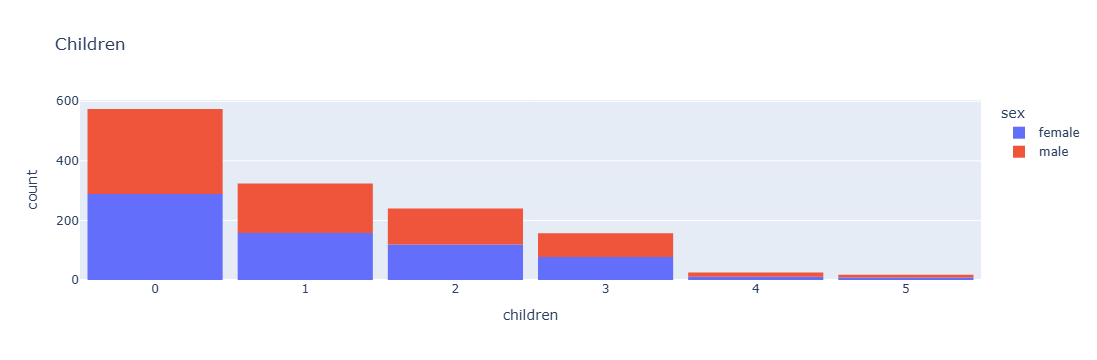

In [54]:
fig = px.histogram(medical_df, x='children', color='sex', title='Children')
fig.update_layout(bargap=0.1)

**Спостереження**
- Найбільше клієнтів без дітей.
- Великі сім'ї не є основним сегментом, і ризики, пов'язані з великою кількістю утриманців, обмежені.
- Частка жінок та чоловіків у всіх категоріях майже однакова (50:50).

Після того, як ми розглянули окремі стовпці, тепер можемо візуалізувати взаємозв'язок між "витратами" (значенням, яке ми хочемо прогнозувати) та іншими стовпцями.

### Вік та витрати

Давайте візуалізуємо взаємозв'язок між "віком" та "витратами", використовуючи діаграму розсіювання. Кожна точка на діаграмі розсіювання представляє одного клієнта. Ми також використаємо значення у стовпці "курець" для кольору точок.

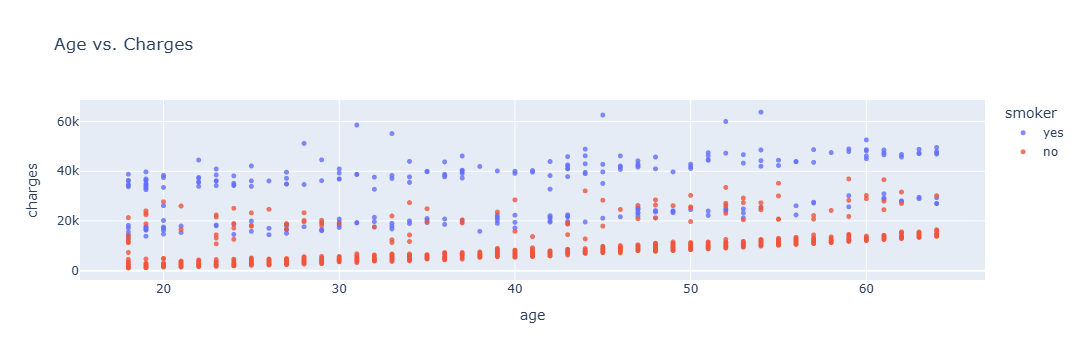

In [55]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Ми можемо зробити наступні висновки з вищенаведеної діаграми:

* Загальна тенденція, здається, полягає в тому, що медичні витрати зростають з віком, як ми могли б очікувати. Однак, є значна варіативність на кожному віці, і очевидно, що вік від самого себе не може бути використаний для точного визначення медичних витрат.


* Ми можемо побачити три "кластери" точок, кожен з яких, здається, формує лінію зі зростаючим нахилом:

     1. Перший і найбільший кластер складається, головним чином, з "здорових некурців", які мають відносно низькі медичні витрати порівняно з іншими.
     
     2. Другий кластер містить суміш курців і некурців. Можливо, це насправді два різних, але перекриваються кластери: "некурці з медичними проблемами" та "курці без серйозних медичних проблем".
     
     3. Останній кластер складається виключно з курців, очевидно, курців з серйозними медичними проблемами, які, можливо, пов'язані або погіршені курінням.
     

> **ВПРАВА 7**: Які інші висновки ви можете зробити з вищенаведеної діаграми?
>
> - Клієнти віком 21 рік мають найменше максимальне значення медичних витрат серед всіх.
> - Найбільші витрати зафіксовані у жінки курця віком 54 роки.

### Індекс маси тіла та витрати

Давайте візуалізуємо відношення між ІМТ (індексом маси тіла) та витратами, використовуючи ще один діаграму розсіювання. Ще раз використаємо значення з колонки "курець" для кольору точок.

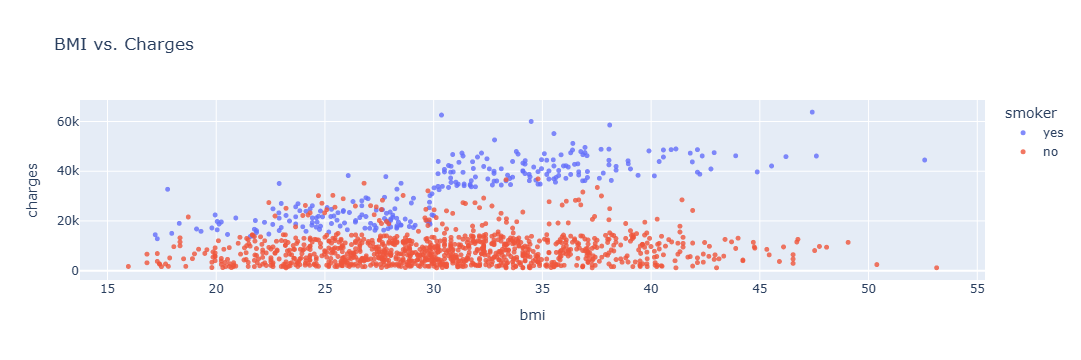

In [56]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

Здається, що для некурців збільшення ІМТ не здається пов'язаним зі збільшенням медичних витрат. Однак медичні витрати, здається, значно вищі для курців з ІМТ більше 30.

Які інші висновки ви можете зробити з вищенаведеного графіка?
- Зі зміною bmi майже не змінюється charges.
- Фіксуються непоодинокі червоні точки (некурці), які знаходяться вище всього скупчення некурців, з charges > 15k. На них має впливати якийсь інший фактор, який цікаво дослідити.

> **ВПРАВА 8**: Створіть ще декілька графіків для візуалізації зв'язку між стовпцем "charges" та іншими стовпцями ("children", "sex", "region" та "smoker"). Підсумуйте висновки, отримані з цих графіків.
>
> *Підказка*: Використовуйте графіки-скрипки (`px.violin`) та стовпчасті діаграми (`sns.barplot`)

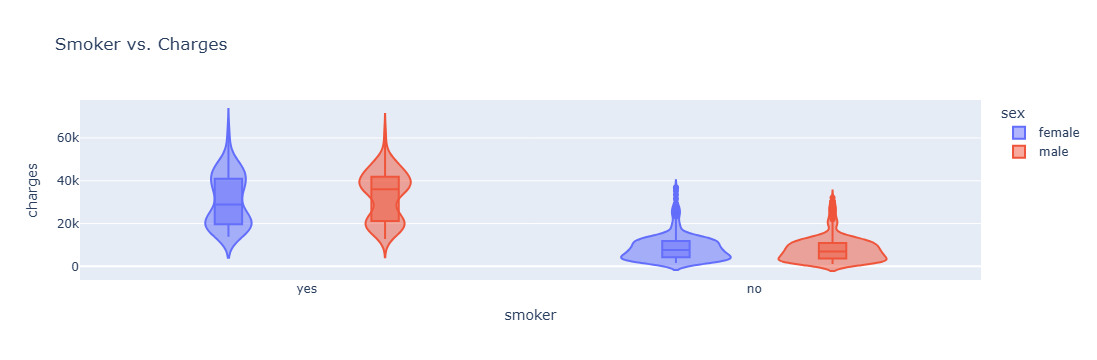

In [75]:
px.violin(medical_df, 
          y='charges', 
          x = 'smoker', 
          color = 'sex', 
          box=True, 
          title='Smoker vs. Charges'
)

**Спостереження**
- У курців витрати в кілька раз більші за некурців, що підтверджує наші попередні спостереження - характеристика курця є ключовою у формуванні страхових витрат.
- Медіана для курців чоловіків переважає над медіаною курців жінок. Ймовырно, чоловіки, які курять, можуть мати або довший стаж, або додаткові супутні ризики.
- Велика частина групи курців створює екстремальні витрати понад 40к.
- У некурців бачимо стабільно низькі витрати на страхування, але вони масові (скрипка низька і товста внизу).
- Медіана в некурців чоловіків та жінок на одному рівні, тобто фактор статі в цій категорії не є суттєвим.

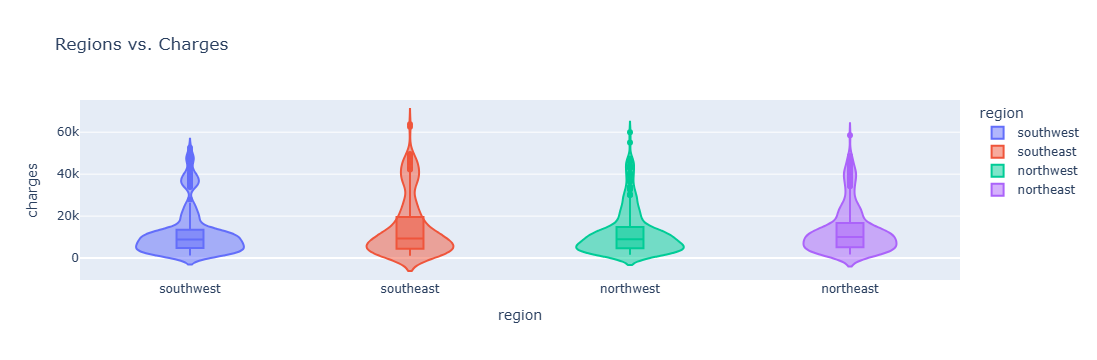

In [78]:
px.violin(medical_df, 
          y='charges', 
          x='region', 
          color='region', 
          box=True,
          title='Regions vs. Charges'
)

**Спостереження**
- Медіана страхових витрат у всіх 4 регіонах майже на одному рівні. Регіональний фактор сам по собі не робить страховку дорожчою для типового клієнта.
- Скрипка регіону southeast має найдовший хвіст, в цьому регіоні найбільша конентрація клієнтів з екстремально високими страховими витратами. Це корелює з нашим попереднім висновком про найбільшу частку курців саме в цьому регіоні.

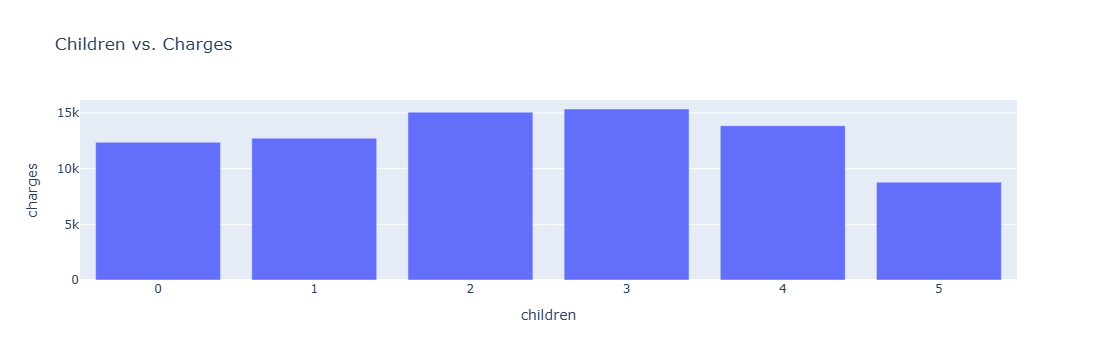

In [79]:
px.bar(medical_df.groupby('children')['charges'].mean().reset_index(), 
       x='children', 
       y='charges',
       title='Children vs. Charges'
)

**Спостереження**
- Є чітка тенденція до зростання середніх страхових витрат від клієнтів без дітей (12k) до клієнтів з 3 дітьми (>15k). Це може свідчити про прямий вплив розміру сім'ї на частоту звернень за медичною допомогою.
- Клієнти з трьома дітьми мають найвищі середні витрати серед усіх категорій і є найдорожчим сегментом для компанії.
- Страхові витрати клієнтів з 5 дітьми є найнижчими на графіку. Для 4-5 дітей нема ефекту збільшення страхових витрат. Ймовірно, це зумовлено малим обсягом даних для цих категорій.

### Кореляція

Як ви можете бачити з аналізу, значення в деяких стовпцях більш тісно пов'язані зі значеннями в "charges" порівняно з іншими стовпцями. Наприклад, "age" та "charges" здається ростуть разом, тоді як "bmi" та "charges" - ні.

Цей зв'язок часто виражається числово за допомогою міри, яка називається _коефіцієнтом кореляції_, який можна обчислити за допомогою методу `.corr` серії Pandas.

In [80]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [81]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

Щоб обчислити кореляцію для категоріальних стовпців, їх спочатку потрібно перетворити на числові стовпці.

In [82]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

Ось як можна інтерпретувати коефіцієнти кореляції ([джерело](https://statisticsbyjim.com/basics/correlations)):

* **Сила**: Чим більше абсолютне значення коефіцієнта кореляції, тим сильніше відношення.

    * Крайні значення -1 та 1 вказують на ідеально лінійне відношення, коли зміна однієї змінної супроводжується абсолютно стабільною зміною іншої. Для цих відношень усі точки даних розташовані на лінії. На практиці ви не побачите жодного типу ідеального відношення.

    * Коефіцієнт нуля представляє відсутність лінійного відношення. Коли одна змінна збільшується, інша змінна не має тенденції збільшуватися або зменшуватися.
    
    * Коли значення знаходиться між 0 та +1/-1, існує відношення, але точки не всі розташовані на лінії. Як r наближається до -1 або 1, сила відношення збільшується, і точки даних схильні розташовуватися ближче до лінії.


* **Напрямок**: Знак коефіцієнта кореляції представляє напрямок відношення.

    * Позитивні коефіцієнти вказують на те, що коли значення однієї змінної збільшується, значення іншої змінної також має тенденцію збільшуватися. Позитивні відношення створюють підйомний нахил на діаграмі розсіювання.
    
    * Негативні коефіцієнти представляють випадки, коли при збільшенні значення однієї змінної, значення іншої змінної має тенденцію зменшуватися. Негативні відношення створюють спадний нахил.

Ось таке ж відношення, виражене візуально ([джерело](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

Коефіцієнт кореляції має наступну формулу:

<img src="https://i.imgur.com/unapugP.png" width="360">

Ви можете дізнатися більше про математичне визначення та геометричну інтерпретацію кореляції тут: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes також надає метод `.corr` для обчислення коефіцієнтів кореляції між усіма парами числових стовпців.

In [ ]:
?medical_df.corr

In [ ]:
medical_df.corr(numeric_only=True).round(3)

,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000


Результат `.corr` називається матрицею кореляції і часто візуалізується за допомогою теплової карти.

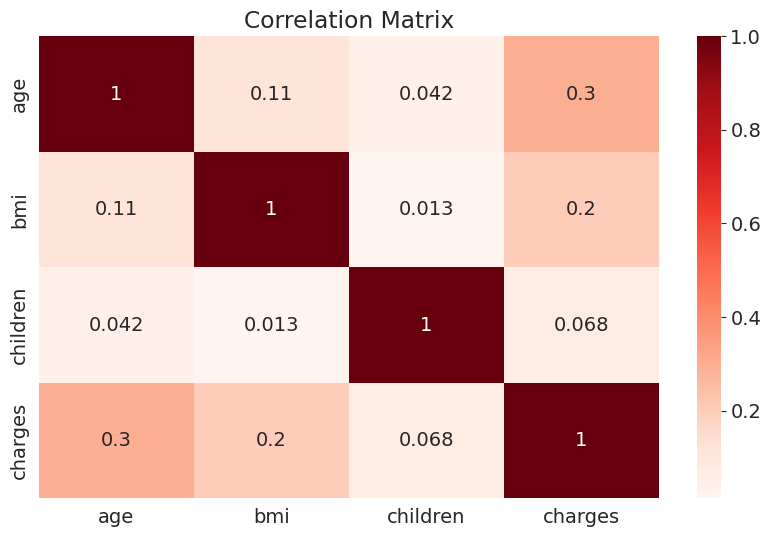

In [ ]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Correlation vs Causality:** Зверніть увагу, що висока кореляція не може бути використана для інтерпретації причинно-наслідкового зв'язку між характеристиками. Дві характеристики $X$ та $Y$ можуть бути корельовані, якщо $X$ спричиняє $Y$ або якщо $Y$ спричиняє $X$, або якщо обидва незалежно спричинені якимось іншим фактором $Z$, і кореляція більше не буде вірною, якщо один з причинно-наслідкових зв'язків порушено. Також можливо, що $X$ та $Y$ просто здаються корельованими, тому що вибірка занадто мала.

Хоча це може здатися очевидним, комп'ютери не можуть відрізнити кореляцію від причинності, і рішення, прийняті на основі автоматизованої системи, часто можуть мати великі наслідки для суспільства, тому важливо вивчати, чому автоматизовані системи призводять до певного результату. Визначення причинно-наслідкових зв'язків вимагає людського розуміння.